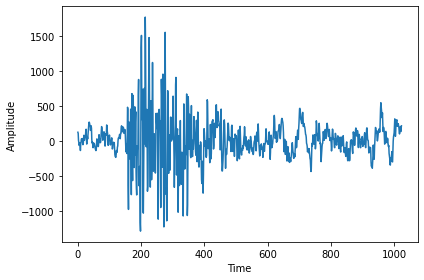

In [1]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
input_data = read("cats_dogs\cat_1.wav")
audio = input_data[1]
plt.plot(audio[0:1024])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

now lets see what librosa can do for us

In [2]:
import librosa
from IPython.display import Audio
import numpy as np

NameError: name 'S' is not defined

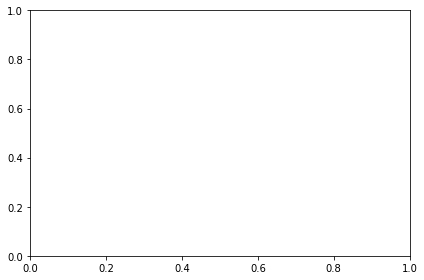

In [24]:
def soundToMelSpectogramm(file: str):
    y, sr = librosa.load(file)
    librosa.feature.melspectrogram(y=y, sr=sr)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                               y_axis='mel', sr=sr,
                               fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
plt.plot(soundToMelSpectogramm("cats_dogs/cat_11.wav"))

NameError: name 'S' is not defined

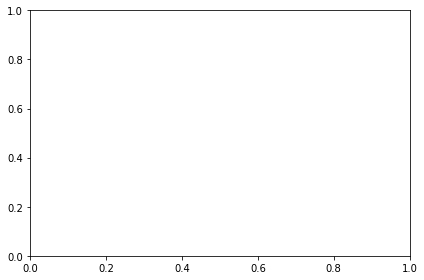

What we can see text is the spectogramm for the givin audio data

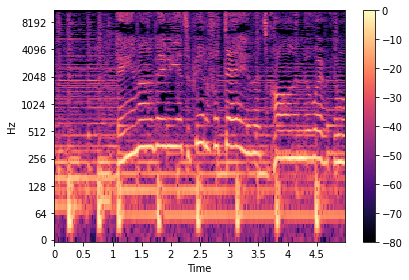

In [4]:

idx = slice(*librosa.time_to_frames([10, 15], sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)

now we will extract the voice lines

In [6]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimum
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)